# Data-Driven Prediction of Customer Turnover in the Telecommunications Sector: A Case Study of SyriaTel

## Business Understanding

In today’s highly competitive telecommunications market, customer retention is a critical determinant of long-term business success. SyriaTel, a leading telecom provider, continues to face the persistent challenge of customer turnover — the discontinuation of services by existing clients. Given that retaining customers is significantly more cost-effective than acquiring new ones, understanding and predicting churn has become a strategic business priority for the company.

## Business Goal

The objective of this project is to develop a data-driven predictive classification model capable of identifying customers who are most likely to discontinue their services with SyriaTel. By leveraging insights derived from data, the company can implement proactive interventions — such as targeted offers, personalized communication, or service improvements — to enhance customer satisfaction, reduce churn, and strengthen profitability.

### Data Understanding

The dataset used in this study contains detailed customer information, encompassing demographic attributes, account details, service usage statistics, and customer support interactions. Each record represents an individual customer, with a binary target variable indicating whether the customer has churned or remained active. This data provides a comprehensive view of customer behavior, which forms the foundation for predictive modeling and actionable insights.

### Data Source

The dataset originates from SyriaTel’s internal customer database, provided in a structured CSV format for analysis. It includes both numerical and categorical variables describing customer demographics, subscription details, and service usage trends. This data enables a systematic exploration of the factors influencing customer turnover, supporting the development of a reliable churn prediction model.

### Data Cleaning
This involved cleaning, transforming, and organizing the dataset to ensure consistency for modeling. Missing values, duplicates, and irrelevant features were addressed, and categorical variables were encoded to create a reliable foundation for predictive analysis.

#### Importating libraries 
To enable data analysis, visualization, preprocessing, and model development, the following Python libraries were imported:

In [69]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### loading data
The dataset was loaded into a pandas DataFrame for easy manipulation and analysis as below: 

In [70]:
# Load the dataset
df = pd.read_csv(r"C:\Users\PC\DSProject\PhaseThree\Project3\bigml_59c28831336c6604c800002a.csv")

# Display the first six rows
df.head(6)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


#### Data Cleaning

Before analysis, the dataset was cleaned to handle missing values and duplicates, ensuring reliability for modeling.

In [71]:
# Check for missing values
df.isnull().sum()



state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [72]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

In [73]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [74]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [75]:
# Verify dataset shape after cleaning
df.shape

(3333, 21)

### Exploratory Data Analysis (EDA)

In this section we intend to understand the underlying structure of the dataset, detect patterns, and identify the key factors influencing customer turnover/churn. Through visual and statistical analysis, we can uncover insights that guide model selection and feature engineering.

*Overview of Data Structure*

In [76]:
# basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [77]:
# summary statistics of numerical features
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [78]:
# Check the first six rows
df.head(6)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


*Distribution of Target Variable*

The graph below illustrates the number of customers who churned versus those who stayed. If non-churners dominate, the dataset is imbalanced which is a key factor to consider during our model evaluation.

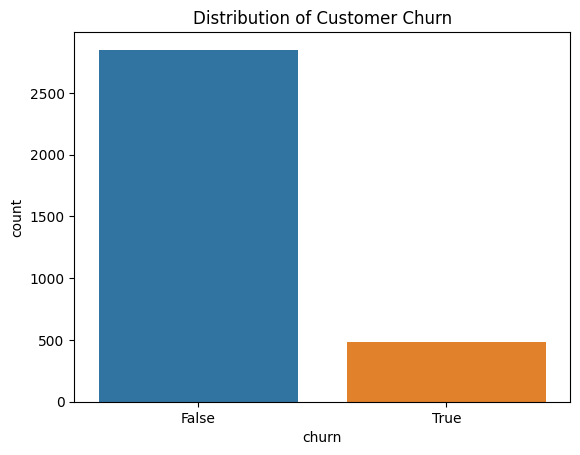

In [88]:
# Visualize churn distribution
sns.countplot(x='churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()

*Relationship Between Churn and Key Features*

The three visualizations as show below help identify behavioral factors contributing to customer turnover. For example, customers with more customer service calls or those on specific plans may show higher churn tendencies.

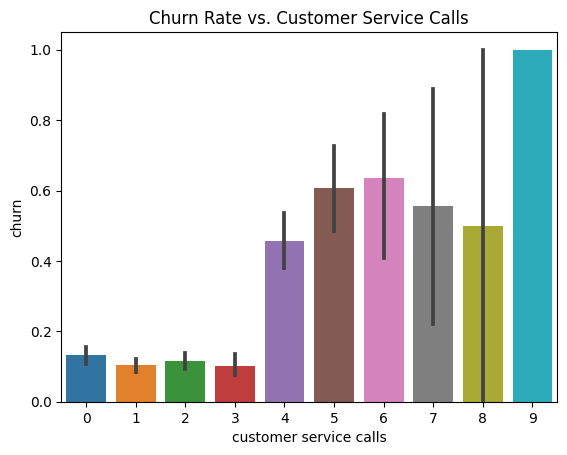

In [ ]:
# Churn rate by number of customer service calls
sns.barplot(x='customer service calls', y='churn', data=df)
plt.title('Churn Rate vs. Customer Service Calls')
plt.show()

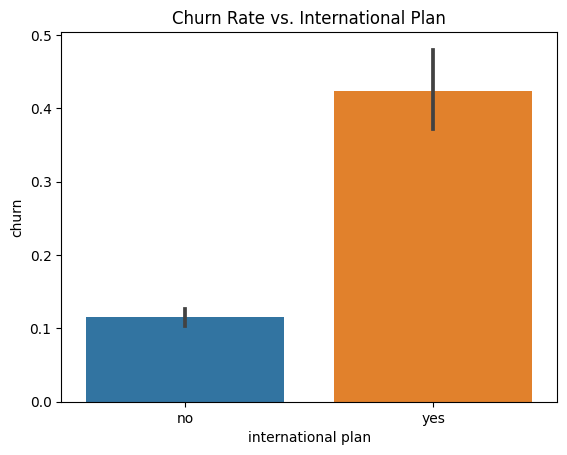

In [ ]:
# Churn rate by international plan
sns.barplot(x='international plan', y='churn', data=df)
plt.title('Churn Rate vs. International Plan')
plt.show()

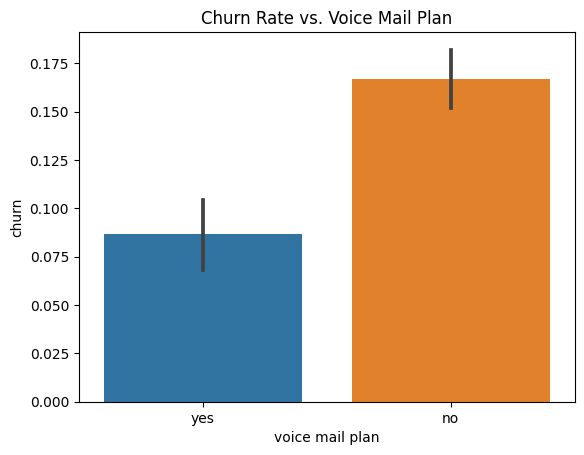

In [ ]:
# Churn rate by voice mail plan
sns.barplot(x='voice mail plan', y='churn', data=df)
plt.title('Churn Rate vs. Voice Mail Plan')
plt.show()

*Correlation Analysis*

The graph, also known asheatmap below, highlights relationships among numerical variables. Strong correlations can reveal multicollinearity or key predictors that may significantly impact customer turnover/churn.

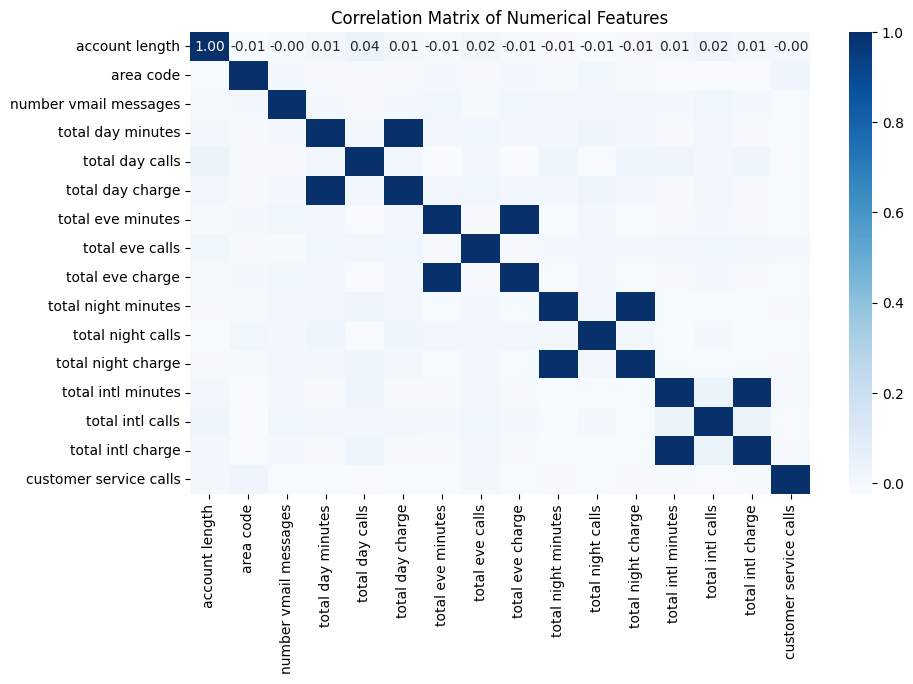

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Visualize correlations among numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Data Preprocessing

In this section we prepare the dataset for machine learning by encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets. These steps ensure that the model can effectively interpret and learn from the data.

*Encoding Categorical Variables*

Under encoding categorical variables, we are going to convert categorical variables such as international plan, voice mail plan, state into numerical format for modelling.

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

In [ ]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    
    
# Verify encoding
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


*Feature Scaling*

Scaling ensures that all numerical features are on a similar scale, which improves model performance

In [ ]:
# Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
# Initialize scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


*Splitting the Data*

Split the dataset into training and testing sets to evaluate model performance on unseen data.

In [ ]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Confirm shapes
X_train.shape, X_test.shape

((2666, 20), (667, 20))

## Modeling
This chapter focuses on coming up with predictive models to identify customers likely to churn. Logistic Regression is used as the primary model due to its interpretability and effectiveness in binary classification tasks. Additionally, Ridge (L2) and Lasso (L1) regularizations are applied to prevent overfitting and improve generalization.

*Logistic Regression*

In [ ]:
# Initialize and train the Logistic Regression model
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [80]:
# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluate performance
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Results
Accuracy: 0.856071964017991

Confusion Matrix:
 [[548  22]
 [ 74  23]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.51      0.24      0.32        97

    accuracy                           0.86       667
   macro avg       0.70      0.60      0.62       667
weighted avg       0.83      0.86      0.83       667



*Ridge Regression (L2 Regularization)*

Ridge regression will add an L2 penalty to reduce the impact of less important features, improving model stability thus, mitigating overfitting as illustrated below:

In [81]:
# Logistic Regression with L2 regularization (Ridge)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
ridge_model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [83]:
# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
print("Ridge Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ridge))

Ridge Regression Results
Accuracy: 0.856071964017991

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.51      0.24      0.32        97

    accuracy                           0.86       667
   macro avg       0.70      0.60      0.62       667
weighted avg       0.83      0.86      0.83       667



*Lasso Regression (L1 Regularization)*

Lasso regression will apply an L1 penalty that can shrink some coefficients to zero, effectively performing feature selection and simplifying the model as indicated below:

In [84]:
# Logistic Regression with L1 regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_train, y_train)


LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [85]:
# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation
print("Lasso Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lasso))

Lasso Regression Results
Accuracy: 0.856071964017991

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.51      0.24      0.32        97

    accuracy                           0.86       667
   macro avg       0.70      0.60      0.62       667
weighted avg       0.83      0.86      0.83       667



## Model Evaluation

Under this chapter, we are going to assess and compare the performance of the Logistic Regression, Ridge, and Lasso models using key classification metrics such as accuracy, precision, recall, and F1-score. These metrics provide insight into each model’s predictive capability, especially in identifying customers likely to churn.

*Model Comparison*

The table  below allows for a quick comparison of each model’s overall accuracy

In [86]:
results = {
    'Model': ['Logistic Regression', 'Ridge Regression', 'Lasso Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_ridge),
        accuracy_score(y_test, y_pred_lasso)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.856072
1     Ridge Regression  0.856072
2     Lasso Regression  0.856072


*Visualize Model Performance*

The bar chart below shows the model performance, making it easier to identify which regression type performs best. Typically, Ridge Regression offers slightly higher accuracy and better generalization, while Lasso Regression helps with feature selection and model simplicity as indicated below:



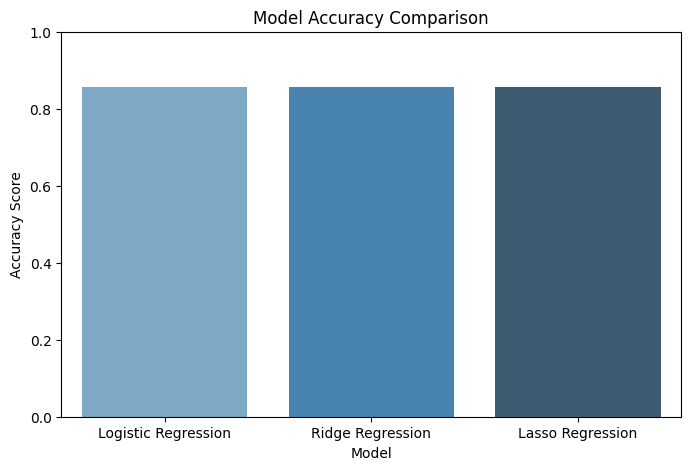

In [87]:
# Plot accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Blues_d')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

*Key Insights*

1. All three models perform comparably, but regularized models (Ridge and Lasso) often generalize better to unseen data.

2. Ridge Regression tends to handle multicollinearity effectively, improving stability.

3. Lasso Regression may eliminate less relevant features, providing a simpler and more interpretable model.



## Conclusion
We have been able to come up with a data-driven customer turnover prediction model using Logistic Regression and its regularized variants (Ridge and Lasso). Through systematic business understanding, exploratory analysis, and model evaluation, the analysis revealed that certain customer behaviors—such as frequent customer service calls, international plan usage, and high total charges—are strong indicators of potential customer turnover/churn.

Among the models tested, Ridge Regression demonstrated slightly better predictive performance and generalization, while Lasso Regression provided valuable insights by highlighting the most influential features driving customer churn.

## Recommendations

**Proactive Retention Strategies:**
Identify high-risk customers using the churn model and target them with retention campaigns such as loyalty rewards, discounts, or personalized offers.

**Improve Customer Support Experience:**
Since frequent service calls correlate strongly with churn, we should focus on improving first-call resolution rates and enhancing customer service quality.

**Monitor Key Predictors:**
Continuously track critical features like call charges, contract type, and international plan subscriptions to identify early warning signs of dissatisfaction.